<a href="https://colab.research.google.com/github/YMGYM/TSE_Learning/blob/master/garbage_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Info

This is my parctice file which train a Deep-learning model

I used CNN layers, and dataset is from [here](https://www.kaggle.com/asdasdasasdas/garbage-classification)

# Import dataset and preprocessing

## unzip and load

In [ ]:
!unzip -q /content/drive/My\ Drive/Datasets/garbage.zip  -d ./dataset

In [ ]:
import pathlib

data_dir = pathlib.Path('/content/dataset/garbage classification/Garbage classification')
num_of_images = len(list(data_dir.glob('*/*.jpg')))

print(num_of_images)

2527


## Get classes name

In [ ]:
import numpy as np

CLASSES = [item.name for item in data_dir.glob('*')]
np_classes = np.array(CLASSES)
CLASSES

['glass', 'cardboard', 'metal', 'plastic', 'trash', 'paper']

## Import Keras and DataGenerator

In [ ]:
import tensorflow.keras as K

In [ ]:
image_generator = K.preprocessing.image.ImageDataGenerator(rotation_range=180, rescale=1.0/255.0, horizontal_flip=True, vertical_flip=True, brightness_range=(0.5,1.0), validation_split=0.15 )

In [ ]:
image_generator = K.preprocessing.image.ImageDataGenerator(validation_split=0.15)

In [ ]:
BATCH_SIZE = 32
IMAGE_HEIGHT = 400
IMAGE_WIDTH = 400

In [ ]:
generated_train_data = image_generator.flow_from_directory(directory=data_dir, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH), class_mode='categorical', classes=CLASSES, batch_size=BATCH_SIZE, shuffle=True, subset='training')

Found 2150 images belonging to 6 classes.


In [ ]:
generated_validation_data = image_generator.flow_from_directory(directory=data_dir, class_mode='categorical', target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),classes=CLASSES, batch_size=BATCH_SIZE, shuffle=True, subset='validation')

Found 377 images belonging to 6 classes.


## Show Image

In [ ]:
import matplotlib.pyplot as plt

def show_image(image_batch, label_batch):
  plt.figure(figsize = (10,10))
  for n in range(25):
    ax = plt.subplot(5, 5, n+1)
    plt.imshow(image_batch[n])
    plt.title(np_classes[label_batch[n] == 1][0].title())
    plt.axis('off')

# Model Import

가장 기본적인 LeNet-5 을 조금 변형

In [ ]:
DROPOUT_RATE = 0.1

In [ ]:
model_input_layer = K.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
cnn_1 = K.layers.Conv2D(filters=8, kernel_size=(8,8), activation="relu")(model_input_layer)
pool_1 = K.layers.MaxPool2D()(cnn_1)
drop_1 = K.layers.Dropout(DROPOUT_RATE)(pool_1)
norm_1 = K.layers.BatchNormalization()(drop_1)

cnn_2 = K.layers.Conv2D(filters=32, kernel_size=(16,16), activation="relu")(norm_1)
pool_2 = K.layers.MaxPool2D()(cnn_2)
norm_2 = K.layers.BatchNormalization()(pool_2)
# drop_2 = K.layers.Dropout(DROPOUT_RATE)(norm_2)


cnn_2_1 = K.layers.Conv2D(filters=32, kernel_size=(16,16), activation="relu")(norm_2)
norm_3 = K.layers.BatchNormalization()(cnn_2_1)

cnn_3 = K.layers.Conv2D(filters=16, kernel_size=(4,4), activation="relu")(norm_3)
pool_3 = K.layers.MaxPool2D()(cnn_3)
norm_3 = K.layers.BatchNormalization()(pool_3)
# drop_2 = K.layers.Dropout(DROPOUT_RATE)(norm_3)

flatten = K.layers.Flatten()(norm_3)


dense_1 = K.layers.Dense(100, activation='relu')(flatten)
drop_3 = K.layers.Dropout(DROPOUT_RATE)(dense_1)

model_output_layer = K.layers.Dense(len(CLASSES), activation="softmax")(drop_3)

model = K.Model(inputs=model_input_layer, outputs=model_output_layer)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 243, 243, 8)       1544      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 8)       0         
_________________________________________________________________
dropout (Dropout)            (None, 121, 121, 8)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 121, 121, 8)       32        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 32)      65568     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)       

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

## IMPORT Resnet50

In [ ]:
resnet = K.applications.ResNet50(include_top=False)
resnet.trainable=False

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
vgg16 = K.applications.VGG16(include_top=False)
vgg16.trainable=False

In [ ]:
DROPOUT_RATE = 0.15

In [ ]:
model = K.Sequential()
model.add(vgg16)
model.add(K.layers.Dropout(DROPOUT_RATE))
model.add(K.layers.GlobalAveragePooling2D())
# model.add(K.layers.Flatten())

model.add(K.layers.Dense(1024,activation="relu"))
model.add(K.layers.Dense(len(CLASSES), activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
dropout (Dropout)            (None, None, None, 512)   0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 6150      
Total params: 15,246,150
Trainable params: 531,462
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
adam = K.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[K.metrics.categorical_accuracy])

## Model load

In [ ]:
import tensorflow as tf

In [ ]:
latest = tf.train.latest_checkpoint('/content/drive/My Drive/trained_model/garbage/')
latest

'/content/drive/My Drive/trained_model/garbage/garbageVGG16'

In [ ]:
model.load_weights(latest)

In [ ]:
EPOCHS = 400

In [ ]:
cp_callback = K.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/trained_model/garbage/garbageVGG16', save_weights_only=True, save_best_only=True, verbose=1)
# cp_callback = K.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/trained_model/garbage/garbage1', save_weights_only=True, verbose=1)

In [ ]:
model.fit(generated_train_data, epochs=EPOCHS, validation_data = generated_validation_data, callbacks=[cp_callback])

Epoch 1/400
68/68 [==============================] - ETA: 0s - loss: 1.0006 - categorical_accuracy: 0.7112
Epoch 00001: val_loss did not improve from 0.73108
68/68 [==============================] - 18s 266ms/step - loss: 1.0006 - categorical_accuracy: 0.7112 - val_loss: 0.8739 - val_categorical_accuracy: 0.7268
Epoch 2/400
68/68 [==============================] - ETA: 0s - loss: 0.3436 - categorical_accuracy: 0.8805
Epoch 00002: val_loss did not improve from 0.73108
68/68 [==============================] - 16s 238ms/step - loss: 0.3436 - categorical_accuracy: 0.8805 - val_loss: 0.7467 - val_categorical_accuracy: 0.7427
Epoch 3/400
68/68 [==============================] - ETA: 0s - loss: 0.2239 - categorical_accuracy: 0.9191
Epoch 00003: val_loss improved from 0.73108 to 0.60074, saving model to /content/drive/My Drive/trained_model/garbage/garbageVGG16
68/68 [==============================] - 16s 241ms/step - loss: 0.2239 - categorical_accuracy: 0.9191 - val_loss: 0.6007 - val_categor

In [ ]:
def show_predict_image(image_batch, label_batch):
  image_batch = image_batch
  plt.figure(figsize = (30,30))
  for n in range(32):
    ax = plt.subplot(8, 4, n+1)
    plt.imshow(image_batch[n])
    prediction = model.predict(image_batch[n:n+1]).argmax()
    if prediction != label_batch[n].argmax():
      plt.title("<<<<<<" + np_classes[prediction].title() + "/" + np_classes[label_batch[n] == 1][0].title() + ">>>>>>")
    else:
      plt.title(np_classes[prediction].title() + "/" + np_classes[label_batch[n] == 1][0].title())
    plt.axis('off')

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
i, l = generated_validation_data[10]

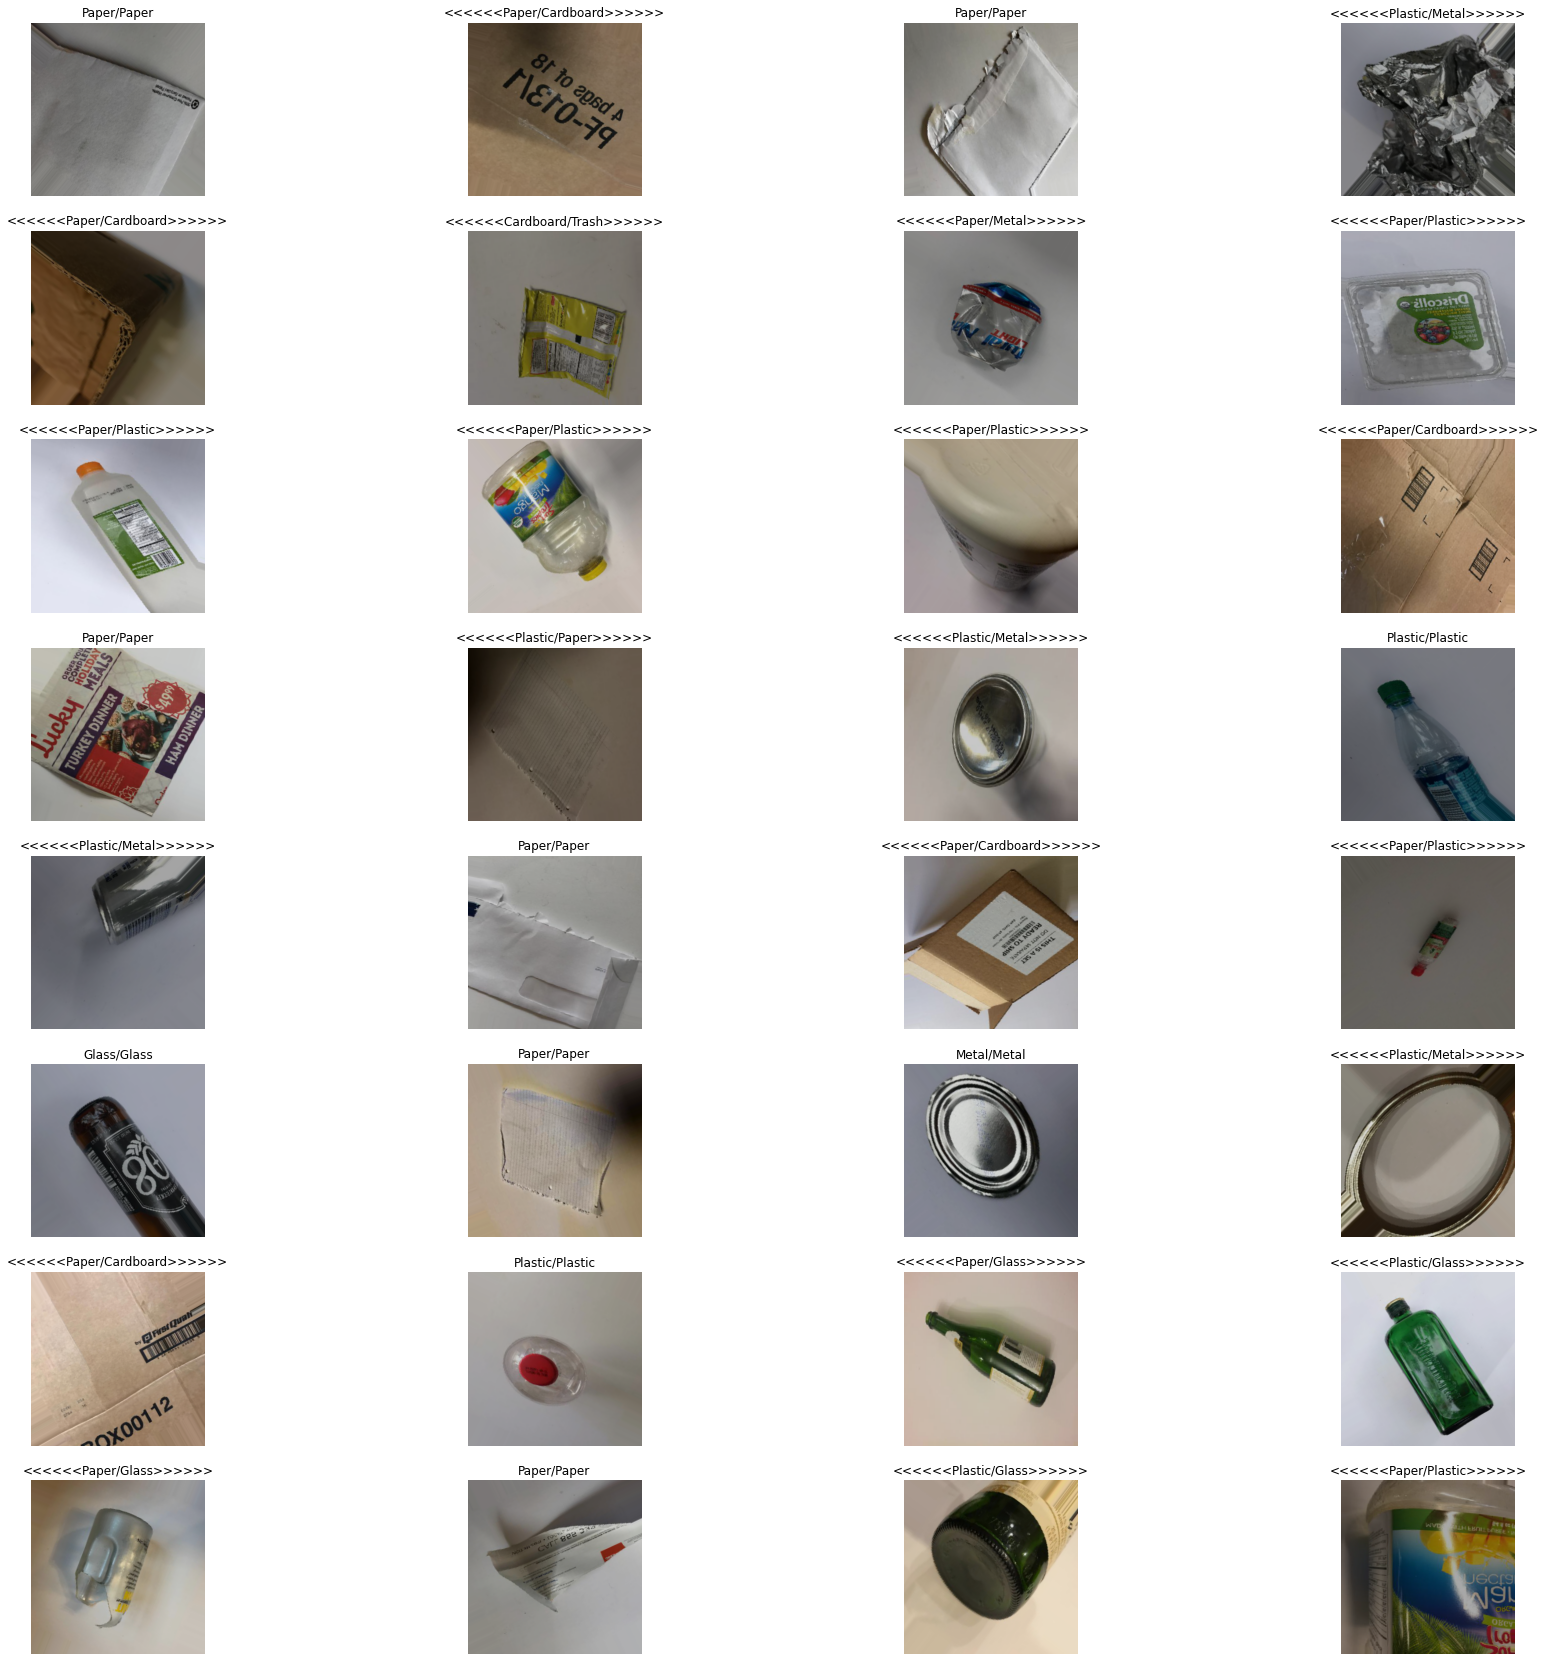

In [ ]:
show_predict_image(i, l)